# Import des bibliothèque 

In [3585]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

//

# Lecture des fichier csv

In [3586]:
dfsounutr = pd.read_csv("sous_nutrition.csv")
dfaidealim = pd.read_csv("aide_alimentaire.csv")
dfdispoal = pd.read_csv("dispo_alimentaire.csv")
dfpop = pd.read_csv("population.csv")



//

## Renommé les colonnes du fichier  sous_nutrition


In [3587]:
dfsounutr.rename(columns= {"Valeur": "Sousnutr", "Année": "Annee"}, inplace= True)

//

## Changement du type de la colonne Sousnutr de str as float

Je donne comme valeur 0 pour les pays avec une sous-nutrition = "<0.1"

In [3588]:
dfsounutr.loc[dfsounutr.Sousnutr == '<0.1', "Sousnutr"] = "0"

Je donne comme type  a la colonne Sousnutre un float (décimal)

In [3589]:
dfsounutr["Sousnutr"] = dfsounutr.Sousnutr.astype(float)

//

## Changement de la date pour la colonne Annee  

J'attribue l'Annee qui est comprise dans un intervalle pour chaque donner. 
C'est-à-dire 2013 et comprise dans l'intervalle [2012-2014] je donne comme valeur Annee 2013  

In [3590]:
dfsounutr.loc[dfsounutr.Annee == "2012-2014", "Annee"] = 2013
dfsounutr.loc[dfsounutr.Annee == "2013-2015", "Annee"] = 2014
dfsounutr.loc[dfsounutr.Annee == "2014-2016", "Annee"] = 2015
dfsounutr.loc[dfsounutr.Annee == "2015-2017", "Annee"] = 2016
dfsounutr.loc[dfsounutr.Annee == "2016-2018", "Annee"] = 2017
dfsounutr.loc[dfsounutr.Annee == "2017-2019", "Annee"] = 2018

//

## Traitement du fichier  aide_alimentaire

Je renomme les colonnes

In [3591]:
dfaidealim.rename(columns= {"Pays bénéficiaire": "Zone","Valeur": "QttAideAlimentaire", "Année": "Annee"}, inplace= True)
# dfaidealim


In [3592]:
# Jrecup val unique d'une column
dfaidealim.Annee.unique()


array([2013, 2014, 2015, 2016], dtype=int64)

//

## Traitement du fichier Population

Je renomme les colonnes


In [3593]:
dfpop.rename(columns={"Valeur": "Population", "Année":"Annee"}, inplace=True)

Je multiplie la colonne Population par 1000 pour récupérer les populations  en milliers d’habitants

In [3594]:
dfpop["Population"] = dfpop["Population"]*1000

In [3595]:
dfpop.dtypes

Zone           object
Annee           int64
Population    float64
dtype: object

//

## Traitement du fichier  dispo_alimentaire


In [3596]:
dfdispoal.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

//

## Je récupère les données liées a l'année 2017 

Je filtre le fichier sous_nutrition

In [3597]:
#je vérifie que on à des données sur l'année 2017 
dfsounutr["Annee"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=object)

In [3598]:
#j'enregistre les données liées a l'année 2017 dans une variable dfsounutre2017
dfsounutr2017 = dfsounutr[dfsounutr["Annee"] == 2017]

Je filtre le fichier Population 

In [3599]:
#je vérifie que on à des données sur l'année 2017 
dfpop["Annee"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [3600]:
#j'enregistre les données liées a l'année 2017 dans une variable dfpop2017
dfpop2017 =  dfpop[dfpop["Annee"] == 2017]

Je filtre le fichier Aide alimentaire 

In [3601]:
dfaidealim["Annee"].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

//

//

#  I Proportion de personnes en état de sous-nutrition 

## Jointure Interne

je fais la jointure interne sur Annee et la Zone ainsi il me renvoie uniquement les lignes avec des caractéristiques similaires 

In [3602]:
df_inner = pd.merge(left = dfsounutr2017, right = dfpop2017 , how = "inner" , on = ["Annee","Zone"])

In [3603]:
df_inner

,Zone,Annee,Sousnutr,Population
0,Afghanistan,2017,10.5,36296113.0
1,Afrique du Sud,2017,3.1,57009756.0
2,Albanie,2017,0.1,2884169.0
3,Algérie,2017,1.3,41389189.0
4,Allemagne,2017,NaN,82658409.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8.0,29402484.0
199,Viet Nam,2017,6.5,94600648.0
200,Yémen,2017,NaN,27834819.0
201,Zambie,2017,NaN,16853599.0


Je convertie la colonne Sousnutr en millions

In [3604]:
df_inner["Sousnutr"]= df_inner["Sousnutr"]*1000000

Calcul des Personnes en sous nutrition pour chaque pays 

In [3605]:
#j'enregistre le resultat dans une variable proportion
proportion = round((df_inner["Sousnutr"]/df_inner["Population"])*100,2)

J'insert la variable dans mon tableau df_inner 

In [3606]:
df_inner.insert(column = "Propotionsousnutrition", value = proportion, loc = 4)

In [3607]:
print("la proportion de personnes en sous nutrition pour chaque pays")
df_inner

la proportion de personnes en sous nutrition pour chaque pays


,Zone,Annee,Sousnutr,Population,Propotionsousnutrition
0,Afghanistan,2017,10500000.0,36296113.0,28.93
1,Afrique du Sud,2017,3100000.0,57009756.0,5.44
2,Albanie,2017,100000.0,2884169.0,3.47
3,Algérie,2017,1300000.0,41389189.0,3.14
4,Allemagne,2017,NaN,82658409.0,NaN
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8000000.0,29402484.0,27.21
199,Viet Nam,2017,6500000.0,94600648.0,6.87
200,Yémen,2017,NaN,27834819.0,NaN
201,Zambie,2017,NaN,16853599.0,NaN


In [3608]:
sousnutrition_mondiale = (df_inner["Sousnutr"].sum()/df_inner["Population"].sum())*100
print("la proportion de personnes en sous nutrition  dans le monde pour l'année 2017 est de", round(sousnutrition_mondiale,2),"%")

la proportion de personnes en sous nutrition  dans le monde pour l'année 2017 est de 7.1 %


//

//


# II Le nombre théorique de personnes qui pourraient être nourries

In [3609]:
#je renomme la colonne Disponibilité alimentaire (Kcal/personne/jour)
dfdispoal.rename(columns = {"Disponibilité alimentaire (Kcal/personne/jour)" : "DispoAl_encalparperparjour"}, inplace=True)

Jointure droite sur Zone pour dfpop2017 et dfdispoal

In [3610]:
dfjoin = pd.merge(dfpop2017, dfdispoal, how= "right", on ="Zone" )

Je récupère la disponibilité alimentaire en calories par jour pour chaque pays 

In [3611]:
DispoAl_encalparjour = dfjoin["DispoAl_encalparperparjour"]*dfjoin["Population"]
dfjoin.insert(column = "DispoAl_encalparjour", value = DispoAl_encalparjour, loc = 8)

Somme de la disponibilité alimentaire en Kcal par jours 

In [3612]:
print("La disponibilité alimentaire mondiale en calories par jour est de:", dfjoin.DispoAl_encalparjour.sum())


La disponibilité alimentaire mondiale en calories par jour est de: 20918984627331.0


Calcul du nombre théorique de personnes pouvons être nourris par jour
<!-- une personne seine a besoin environs de 2250 Kcal/jour
        nous avons 495 442 Kcal de disponible par jour -->

Une personne seine a besoin en moyenne de 2250 kcal par jour en moyenne 
<!-- un homme a besoin en moyenne de 2500 cal/jour -->
<!-- une femme a besoin en moyenne de  2000 cal/jour  -->
<!-- la moyenne des deux nous donne 2250cal/jour par personne  -->

In [3613]:
nbtheorique = dfjoin.DispoAl_encalparjour.sum()/2250
print("Théoriquement on peut nourrir:", nbtheorique, "personnes par jour soient", round(100*(nbtheorique/dfpop2017["Population"].sum()),2), "%", "de la population")
# , " en une année on peut nourrir",round(100*((nbtheorique*365)/dfpop2017["Population"].sum()),2), "%", "de la popolation")

Théoriquement on peut nourrir: 9297326501.036 personnes par jour soient 123.17 % de la population


//

//

## III Calcul du nombre théorique de personnes pouvons être nouris par jour avec la disponibilité vegetal 

Filtre la colonne Origine

In [3614]:
dfdispoal_vegetal = dfjoin[dfjoin["Origine"] == "vegetale"]


Sommes de la disponibilité alimentaire d'origine vegetal en kcal par jour 

In [3615]:
print("La disponibilité alimentaire mondiale d'origine végétal  en calories par jour est de:",dfdispoal_vegetal.DispoAl_encalparjour.sum())

La disponibilité alimentaire mondiale d'origine végétal  en calories par jour est de: 17260764211501.0


In [3616]:
nbtheriquenourisenvegetal = round((dfdispoal_vegetal.DispoAl_encalparjour.sum()/2250),2)
print("Théoriquement on peut nourrir:",nbtheriquenourisenvegetal,"personnes avec la disponibilité végétal soit", round(100*(nbtheriquenourisenvegetal/dfpop2017["Population"].sum()),2),"%", "de la population mondiale")

Théoriquement on peut nourrir: 7671450760.67 personnes avec la disponibilité végétal soit 101.63 % de la population mondiale


//

//

# IV l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine

Part attribuer a l'alimentation animal

In [3617]:
dfattribution = dfdispoal

Je suipprime les valeurs pour lesquels on a pas de données

In [3618]:
dfattributions = dfattribution.dropna()

Par attribuer a l'alimentation animal de la dispo intérieur 

In [3619]:
partanimal = (dfattributions["Aliments pour animaux"]/dfattributions["Disponibilité intérieure"])*100


In [3620]:
dfattributions.insert(column = "Les parts atribuer a l'alimentation animal en % ", value = partanimal, loc = 10)

In [3621]:
print ("la part mondiale attribuer a l'alimentation animal est de ",round(100 * (dfdispoal['Aliments pour animaux'].sum() / dfdispoal['Disponibilité intérieure'].sum()),2),"%")

la part mondiale attribuer a l'alimentation animal est de  13.24 %


Les Parts perdus 

In [3622]:
partperdu = (dfattributions["Pertes"]/dfattributions["Disponibilité intérieure"])*100

In [3623]:
dfattributions.insert(column = "les parts perdus en %", value = partperdu, loc = 11)

In [3624]:
print ("la part mondiale perdus  est de ",round(100 *(dfdispoal['Pertes'].sum() / dfdispoal['Disponibilité intérieure'].sum()),2),"%")

la part mondiale perdus  est de  4.61 %


Les Parts attribuer a l'alimentation humaine

In [3625]:
parthumaine = (dfattributions["Nourriture"]/dfattributions["Disponibilité intérieure"])*100

In [3626]:
dfattributions.insert(column = "Part attribuer a l'alimentation humaine en %", value = parthumaine, loc = 12)

<!-- # pd.set_option('display.max_columns', None)
# dfattributions.head() -->

In [3627]:
print("la part mondiale attribuer a l'alimentation humaine est de ",round(100 * (dfdispoal['Nourriture'].sum() / dfdispoal['Disponibilité intérieure'].sum()),2),"%")

la part mondiale attribuer a l'alimentation humaine est de  49.51 %


## Utilisation des céréale 

In [3628]:
dfcereale = dfdispoal
dfcereale = dfcereale[dfcereale['Produit'].isin(['Orge','Blé','Avoine','Seigle','Riz','Maïs','Millet','Sorgho','Céréale'])]
dfcereale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,DispoAl_encalparperparjour,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0
67,Afrique du Sud,Avoine,vegetale,8.0,NaN,5.0,0.75,0.09,0.16,49.0,4.0,25.0,40.0,1.0,28.0,1.0,NaN,0.0


In [3629]:
atributionanimal = dfcereale["Aliments pour animaux"].sum()/dfcereale["Disponibilité intérieure"].sum()
print("La part des céréale attribuer a l'alimentation animal est de : ", round(atributionanimal*100,2),"%")

La part des céréale attribuer a l'alimentation animal est de :  43.12 %


In [3630]:
atributionhumaine = dfcereale["Nourriture"].sum()/dfcereale["Disponibilité intérieure"].sum()
print("La part des céréale attribuer a l'alimentation humaine est de : ", round(atributionhumaine*100,2),"%")

La part des céréale attribuer a l'alimentation humaine est de :  33.95 %


In [3631]:
pertes = dfcereale["Pertes"].sum()/dfcereale["Disponibilité intérieure"].sum()
print("les parts perdus représente : ", round(pertes*100,2),"%")

les parts perdus représente :  4.15 %


In [3632]:
autreutilisation = dfcereale["Autres Utilisations"].sum()/dfcereale["Disponibilité intérieure"].sum()
print("Autre utilisation : ", round(autreutilisation*100,2),"%")

Autre utilisation :  11.29 %


## Utilisation du manioc par la Thaïlande

je récupère l'index 

In [3633]:
dfindex = dfdispoal[dfdispoal["Zone"]=="Thaïlande"]
dfindex = dfindex[dfindex["Produit"]=="Manioc"]
dfindex

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,DispoAl_encalparperparjour,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


J'enregistre les données dans une nouvelle variable 

In [3634]:
utilisationmanioc = dfindex.iloc[0]
# je récupère les donner qui m'interesse
print(round(((utilisationmanioc["Exportations - Quantité"]/utilisationmanioc["Production"])*100),2),"%", 
"du manioc est exporté", "et",round(((utilisationmanioc["Disponibilité intérieure"]/utilisationmanioc["Production"])*100),2),"%", "et utilisé" )

83.41 % du manioc est exporté et 20.72 % et utilisé


In [3635]:
utilisationmanioc

Zone                                                             Thaïlande
Produit                                                             Manioc
Origine                                                           vegetale
Aliments pour animaux                                               1800.0
Autres Utilisations                                                 2081.0
DispoAl_encalparperparjour                                            40.0
Disponibilité alimentaire en quantité (kg/personne/an)                13.0
Disponibilité de matière grasse en quantité (g/personne/jour)         0.05
Disponibilité de protéines en quantité (g/personne/jour)              0.14
Disponibilité intérieure                                            6264.0
Exportations - Quantité                                            25214.0
Importations - Quantité                                             1250.0
Nourriture                                                           871.0
Pertes                   

Je filtre mon fichier sous_nutrition pour ne récupérer que les données de 2013 

In [3636]:
dfsounutr2013 = dfsounutr[dfsounutr["Annee"] == 2013] 
dfpop2013 = dfpop[dfpop["Annee"] == 2013]

Je fais une jointure droite pour voir l'utilisation du manioc par la Thaïlande aux
égards de la proportion de personnes en sous-nutrition

In [3637]:
dfjoinmaniocsounutr = pd.merge(dfsounutr2013,dfindex,  on = "Zone", how="right")
dfjoinmaniocsounutr = pd.merge(dfpop2013,dfjoinmaniocsounutr, on="Zone", how="right")

In [3638]:
#je met les données "Sousnutr" en millier 
dfjoinmaniocsounutr["Sousnutr"] = dfjoinmaniocsounutr["Sousnutr"]*1000000

Quelle est l'utilisation de la disponibilité intérieure du manioc 

In [3639]:
alimhumaine = 100*utilisationmanioc["Nourriture"]/utilisationmanioc["Disponibilité intérieure"]
print(round(alimhumaine,2),"%", "du manioc est utilisé pour l'alimentation humaine")

13.9 % du manioc est utilisé pour l'alimentation humaine


In [3640]:
alimanimal = 100*utilisationmanioc["Aliments pour animaux"]/utilisationmanioc["Disponibilité intérieure"]
print(round(alimanimal,2),"%", "du manioc est utilisé pour l'alimentation animal")

28.74 % du manioc est utilisé pour l'alimentation animal


Personnes en sous nutrition en Thaïlande 

In [3641]:
sousnutrThailande = dfjoinmaniocsounutr.iloc[0]
print("En Thaïlande",round(100*(sousnutrThailande["Sousnutr"]/sousnutrThailande["Population"]),2),"%", "de la population est en sous nutrition")

En Thaïlande 9.1 % de la population est en sous nutrition


Disponibiliter en calorie par jour

In [3642]:
dispocaljourThailande = sousnutrThailande["Population"]*sousnutrThailande["DispoAl_encalparperparjour"]
print("Nous avons ",dispocaljourThailande,"de calorie disponible par jour")

Nous avons  2725780720.0 de calorie disponible par jour


Personnes pouvons êtres nourris avec la disponibilité en cal par jour du manioc

In [3643]:
print("Avec les calories disponibles on peut nourrir",round((dispocaljourThailande/2250),2), "personnes", "soit",round(100*((dispocaljourThailande/2250)/sousnutrThailande["Population"]),2),"%", "de la population" )


Avec les calories disponibles on peut nourrir 1211458.1 personnes soit 1.78 % de la population


//

//

//

# V Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

suppression des valeur NaN

In [3644]:
dfsousnutrion2017 = df_inner[~pd.isnull(df_inner.Sousnutr)]

Organisation des données par ordre décroissans 

In [3645]:
dfsousnutrion2017 = dfsousnutrion2017.sort_values(by ='Propotionsousnutrition', ascending=False)
dfsousnutrion2017

,Zone,Annee,Sousnutr,Population,Propotionsousnutrition
78,Haïti,2017,5300000.0,10982366.0,48.26
157,République populaire démocratique de Corée,2017,12000000.0,25429825.0,47.19
108,Madagascar,2017,10500000.0,25570512.0,41.06
103,Libéria,2017,1800000.0,4702226.0,38.28
100,Lesotho,2017,800000.0,2091534.0,38.25
...,...,...,...,...,...
63,Fidji,2017,0.0,877459.0,0.00
77,Guyana,2017,0.0,775222.0,0.00
83,Îles Salomon,2017,0.0,636039.0,0.00
115,Maurice,2017,0.0,1264499.0,0.00


Les 20 premier pays pour lesquels les personnes en sous nutrition est la plus forte en 2017

In [3646]:
dfpaysousnutreestlaplusfort = dfsousnutrion2017.head(20)
dfautre = dfsousnutrion2017
dfpaysousnutreestlaplusfort


,Zone,Annee,Sousnutr,Population,Propotionsousnutrition
78,Haïti,2017,5300000.0,10982366.0,48.26
157,République populaire démocratique de Corée,2017,12000000.0,25429825.0,47.19
108,Madagascar,2017,10500000.0,25570512.0,41.06
103,Libéria,2017,1800000.0,4702226.0,38.28
100,Lesotho,2017,800000.0,2091534.0,38.25
183,Tchad,2017,5700000.0,15016753.0,37.96
161,Rwanda,2017,4200000.0,11980961.0,35.06
121,Mozambique,2017,9400000.0,28649018.0,32.81
186,Timor-Leste,2017,400000.0,1243258.0,32.17
0,Afghanistan,2017,10500000.0,36296113.0,28.93


j'enregistre les autre donner dans une variable autre 

In [3647]:
dfautre = dfautre[dfautre['Propotionsousnutrition']<19.83]
dfautre['Propotionsousnutrition'].sum()

569.85

je crée une variable autres est lui attribut des données  

In [3648]:
autres = {"Zone":"Autre", "Propotionsousnutrition": dfautre["Propotionsousnutrition"].sum(),}

In [3649]:
print(autres)

{'Zone': 'Autre', 'Propotionsousnutrition': 569.85}


In [3650]:
dfpaysousnutreestlaplusfort[["Zone","Propotionsousnutrition"]]

,Zone,Propotionsousnutrition
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
183,Tchad,37.96
161,Rwanda,35.06
121,Mozambique,32.81
186,Timor-Leste,32.17
0,Afghanistan,28.93


Je crée une graphique pour mettre en évidence les pays ou la sousnutrition et la plus forte

In [3651]:
var_x = dfpaysousnutreestlaplusfort["Zone"]
var_y = dfpaysousnutreestlaplusfort["Propotionsousnutrition"]
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


<!-- # plt.plot(var_x, var_y)
# plt.barh(var_x,var_y )
# plt.ylabel('Zone géographique')
# plt.xlabel('Proportion de personne e sous nutrition') -->

Text(0.5, 1.0, '10 premier pays ou la sous nutrition est la plus fort')

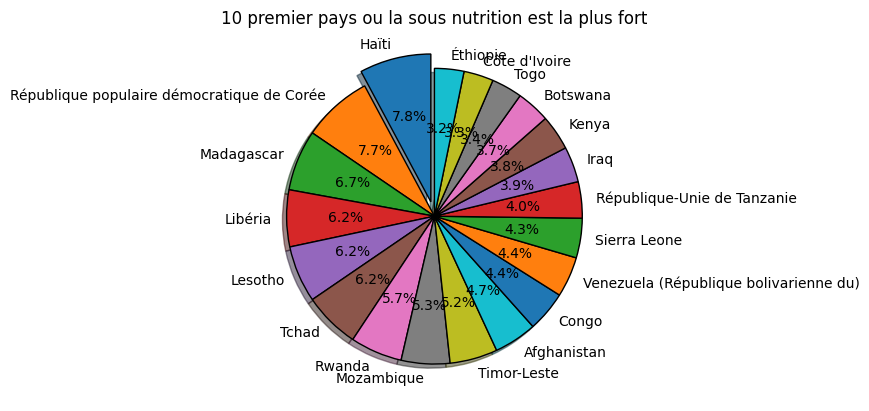

In [3652]:
plt.pie(var_y, labels=var_x,explode=explode, shadow=True,startangle = 90, autopct = '%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('10 premier pays ou la sous nutrition est la plus fort')



J'ajoute les donneé de la variable autres a mon dataframe paysousnutrplufort

In [3653]:
dfpaysousnutrestlaplusfort = dfpaysousnutreestlaplusfort.append(autres,ignore_index=True)

C:\Users\ikram\AppData\Local\Temp\ipykernel_14028\4145523276.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfpaysousnutrestlaplusfort = dfpaysousnutreestlaplusfort.append(autres,ignore_index=True)


In [3654]:
dfpaysousnutrestlaplusfort

,Zone,Annee,Sousnutr,Population,Propotionsousnutrition
0,Haïti,2017,5300000.0,10982366.0,48.26
1,République populaire démocratique de Corée,2017,12000000.0,25429825.0,47.19
2,Madagascar,2017,10500000.0,25570512.0,41.06
3,Libéria,2017,1800000.0,4702226.0,38.28
4,Lesotho,2017,800000.0,2091534.0,38.25
5,Tchad,2017,5700000.0,15016753.0,37.96
6,Rwanda,2017,4200000.0,11980961.0,35.06
7,Mozambique,2017,9400000.0,28649018.0,32.81
8,Timor-Leste,2017,400000.0,1243258.0,32.17
9,Afghanistan,2017,10500000.0,36296113.0,28.93


In [3655]:
zone = dfpaysousnutrestlaplusfort["Zone"]
proportion = dfpaysousnutrestlaplusfort["Propotionsousnutrition"]
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1]

<!-- # plt.barh(zone,proportion)
# plt.ylabel('Zone géographique')
# plt.xlabel('Proportion de personne e sous nutrition') -->

Text(0.5, 1.0, 'Proportion de la sous nutrition dans le monde ')

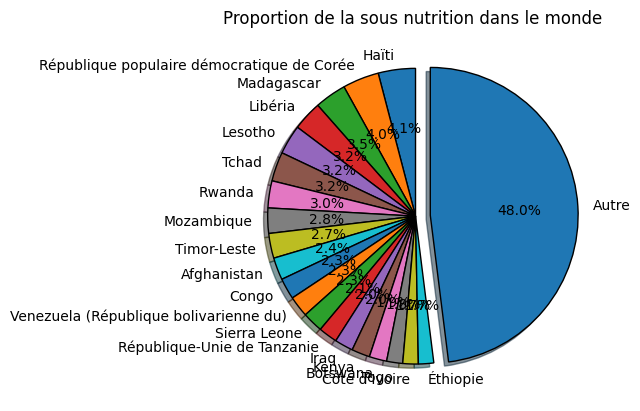

In [3656]:
plt.pie(proportion, labels= zone,explode=explode,startangle = 90, autopct = '%1.1f%%' ,shadow=True, wedgeprops={'edgecolor':'black'})
plt.title('Proportion de la sous nutrition dans le monde ')

# VI Pays ayant le plus bénéficié d’aide depuis 2013

Je veux récupérer les pays ayant le plus bénéficié d'aide depuis 2013  de ce fais je n'ai besoin que de deux colonne pour la variable dfaidealim Zone est QttAideAlimentaire 

J'enregitre mes donner dans une nouvelle variable pour ne récupéré que les colonne qui m'interesse 

In [3657]:
dfaidealimentaire = dfaidealim

In [3658]:
dfaidealimentaire = dfaidealimentaire.groupby(["Zone"]).sum()

C:\Users\ikram\AppData\Local\Temp\ipykernel_14028\2869633822.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfaidealimentaire = dfaidealimentaire.groupby(["Zone"]).sum()


Je récupère les 20 premiers pays ayant recus le plus d'aide depuis 2013

In [3659]:
dfpaysayantleplusrecudaide = dfaidealimentaire.sort_values(by=["QttAideAlimentaire"], ascending=False).head(20)

In [3660]:
dfpaysayantleplusrecudaide[["QttAideAlimentaire"]]

,QttAideAlimentaire
Zone,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


# VII Pays ayant le plus/moins de disponibilité/habitant

//

## Les 20 premier pays avec le plus de Disponibiliter par habitant 

J'enregistre les donner du fichier dispo_alimentaire dans une nouvelle variable 

In [3661]:
dfdispoparhabplusforte= dfdispoal

Je fais un groupe by sur Zone

In [3662]:
dfdispoparhabplusforte  = dfdispoparhabplusforte.groupby(["Zone"]).sum()

C:\Users\ikram\AppData\Local\Temp\ipykernel_14028\2066997763.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfdispoparhabplusforte  = dfdispoparhabplusforte.groupby(["Zone"]).sum()


Je trie mon tableau par ordre decroissant

In [3663]:
dfdispoparhabplusforte = dfdispoparhabplusforte.sort_values(by=['DispoAl_encalparperparjour'], ascending= False)

In [3664]:
dfdispoparhabplusforte[[ "DispoAl_encalparperparjour"]].head(10)

,DispoAl_encalparperparjour
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


## Les 10 premier pays avec le moins de disponibiliter par habitant 

Je trie mon tableau par ordre croissant 

In [3665]:
dfdispoparhabplusfaible = dfdispoparhabplusforte.sort_values(by=['DispoAl_encalparperparjour'], ascending= True)

In [3666]:
dfdispoparhabplusfaible[[ "DispoAl_encalparperparjour"]].head(10)

,DispoAl_encalparperparjour
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0
